      id  female     ses  schtyp      prog  read  write  math  science  \
0     45  female     low  public  vocation    34     35    41       29   
1    108    male  middle  public   general    34     33    41       36   
2     15    male    high  public  vocation    39     39    44       26   
3     67    male     low  public  vocation    37     37    42       33   
4    153    male  middle  public  vocation    39     31    40       39   
..   ...     ...     ...     ...       ...   ...    ...   ...      ...   
195  100  female    high  public  academic    63     65    71       69   
196  143    male  middle  public  vocation    63     63    75       72   
197   68    male  middle  public  academic    73     67    71       63   
198   57  female  middle  public  academic    71     65    72       66   
199  132    male  middle  public  academic    73     62    73       69   

           honors  
0    not enrolled  
1    not enrolled  
2    not enrolled  
3    not enrolled  
4    not en

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


1.0

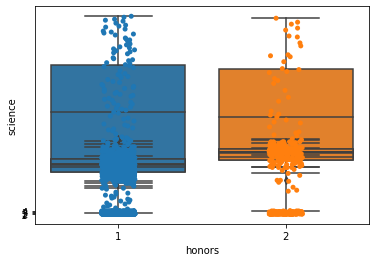

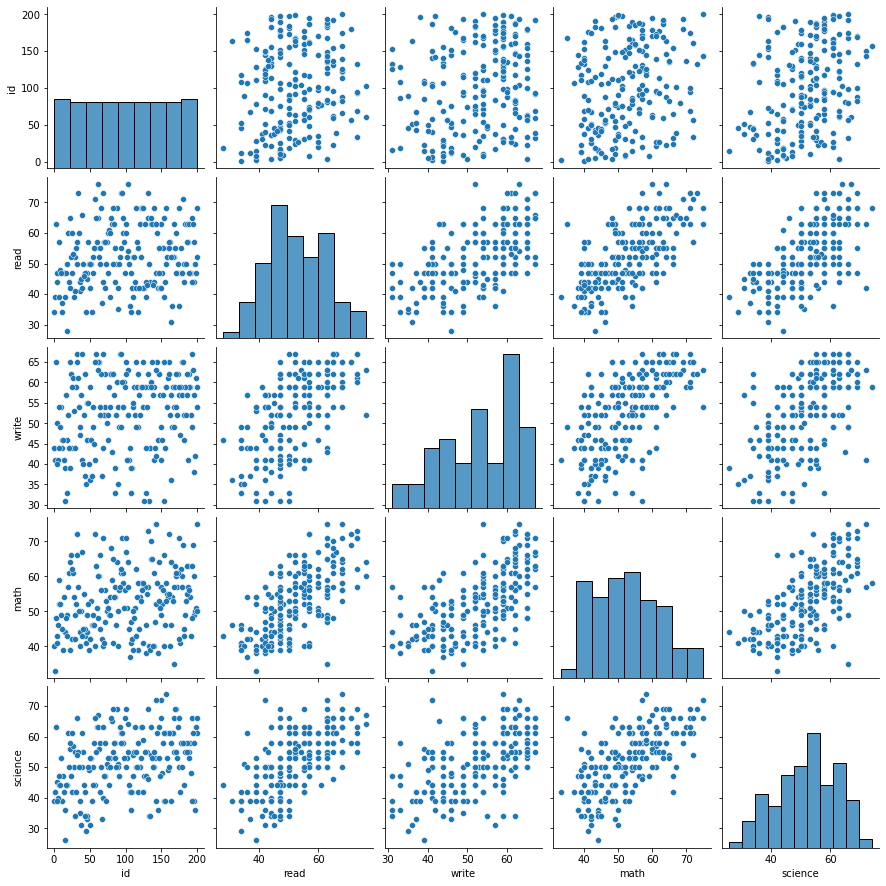

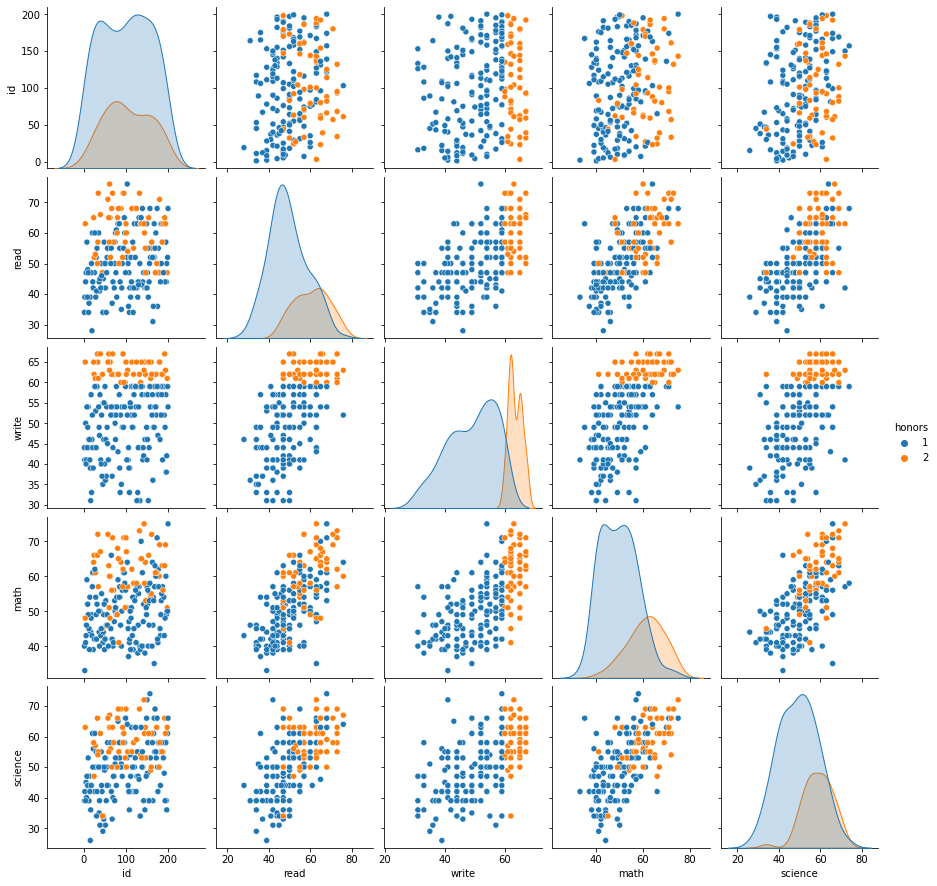

In [2]:
#Multinomial Regression
#Problem Statement: 
#A University would like to effectively classify their student based on the Program they are enrolled into, perform multinomial regression on the given dataset and provide insights in the documentation.
#prog: is a categorical variable indicating what type of program a student is in: “General” (1), “Academic” (2), or “Vocational” (3)
#Ses: is a categorical variable indicating someone’s socioeconomic class: “Low” (1), “Middle” (2), and “High” (3)
#read, write, math, science are their scores on different tests
#honors: Whether they have enrolled or not
#Answer;-
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Multinomial\mdata.csv")
df.head()
df.describe()
df.honors.value_counts() 
df.drop('Unnamed: 0', axis=1, inplace=True) 
df.columns
df.dtypes
#converting the data column 
print(df)
df['female'].replace({'female':'1','male':'2'}, inplace= True)
df['ses'].replace({'low':'1','middle':'2','high':'3'}, inplace= True)
df['schtyp'].replace({'public':'1','private':'2'}, inplace= True)
df['prog'].replace({'vocation':'1','general1':'2','academic':'3','general':'4'}, inplace= True)
df['honors'].replace({'not enrolled':'1', 'enrolled':'2'}, inplace= True)
# Boxplot of independent variable distribution for each category of choice 
sns.boxplot(x = "honors", y = "id", data = df)
sns.boxplot(x = "honors", y = "read", data = df)
sns.boxplot(x = "honors", y = "write", data = df)
sns.boxplot(x = "honors", y = "math", data = df)
sns.boxplot(x = "honors", y = "science", data = df)

# Scatter plot for each categorical choice of car
sns.stripplot(x = "honors", y = "id", jitter = True, data = df)
sns.stripplot(x = "honors", y = "female", jitter = True, data = df)
sns.stripplot(x = "honors", y = "ses", jitter = True, data = df)
sns.stripplot(x = "honors", y = "schtyp", jitter = True, data = df)
sns.stripplot(x = "honors", y = "prog", jitter = True, data = df)
sns.stripplot(x = "honors", y = "read", jitter = True, data = df)
sns.stripplot(x = "honors", y = "write", jitter = True, data = df)
sns.stripplot(x = "honors", y = "math", jitter = True, data = df)
sns.stripplot(x = "honors", y = "science", jitter = True, data = df)

# Scatter plot between each possible pair of independent variable and also histogram for each independent variable 
sns.pairplot(df) # Normal
sns.pairplot(df, hue = "honors") 

# Correlation values between each independent features
df.corr()

train, test = train_test_split(df, test_size = 0.2)

# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers

df = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:, 1:], train.iloc[:, 0])
help(LogisticRegression)

test_predict = df.predict(test.iloc[:, 1:]) # Test predictions

# Test accuracy 
accuracy_score(test.iloc[:,0], test_predict)

train_predict = df.predict(train.iloc[:, 1:]) # Train predictions 
# Train accuracy 
accuracy_score(train.iloc[:,0], train_predict) 

In [3]:
#Problem statement: 

#You work for a consumer finance company which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: 
#• If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company 
#• If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company 

#The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

#In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default. 

#When a person applies for a loan, there are two types of decisions that could be taken by the company: 
#1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below: 
#o Fully paid: Applicant has fully paid the loan (the principal and the interest rate) 
#o Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'. 
#o Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan  
#2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
#This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through an online interface.  
#Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.  
#If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
#In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.  
#Perform Multinomial regression on the dataset in which loan_status is the output (Y) variable and it has three levels in it. 
#Answer;-
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Multinomial\loan.csv")

df.columns

loan =df[["loan_status" ,"loan_amnt","funded_amnt","term","int_rate" ,"installment" ,"emp_length","annual_inc" ,"issue_d" ,"purpose", "delinq_2yrs", "open_acc" ,"revol_bal", "total_acc", "total_pymnt", "last_pymnt_amnt" , "inq_last_6mths","out_prncp_inv", "total_rec_prncp","total_rec_int" ,"last_pymnt_d","last_pymnt_amnt" ]]
#checking for NA
loan.isna().sum()
#droping NA
loan1 = loan.dropna()
loan1.isna().sum()
#removing the % symbol
loan1['int_rate'] = loan1['int_rate'].str.replace(r'%', '')
loan1['int_rate']= pd.to_numeric(loan1['int_rate'], downcast="float")
#removing word months from the term
loan1['term'] = loan1['term'].str.replace(r'months', '')
loan1['term'] = pd.to_numeric(loan1['term'], downcast="float")


from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
loan1['last_pymnt_d'] = labelencoder.fit_transform(loan1['last_pymnt_d'])
loan1['purpose'] = labelencoder.fit_transform(loan1['purpose'])
loan1['issue_d'] = labelencoder.fit_transform(loan1['issue_d'])
loan1['emp_length'] = labelencoder.fit_transform(loan1['emp_length'])

# Correlation values between each independent features
loan1.corr()

train, test = train_test_split(loan1, test_size = 0.2)

# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:, 1:], train.iloc[:, 0])
help(LogisticRegression)

test_predict = model.predict(test.iloc[:, 1:]) # Test predictions

# Test accuracy 
accuracy_score(test.iloc[:,0], test_predict)

train_predict = model.predict(train.iloc[:, 1:]) # Train predictions 
# Train accuracy 
accuracy_score(train.iloc[:,0], train_predict) 

C:\Users\tarun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\tarun\AppData\Local\Temp/ipykernel_3308/3459606672.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['int_rate'] = loan1['int_rate'].str.replace(r'%', '')
C:\Users\tarun\AppData\Local\Temp/ipykernel_3308/3459606672.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


0.9999675955930006